# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [58]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

I first split the data for model training.

In [59]:
# Split the data into training and test sets
X = crops.drop('crop', axis=1)
y = crops['crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The next part is training the initial model.

In [60]:
# Perform a loop to predict 'crop' using each feature individually
for feature in ["N", "P", "K", "ph"]:
    
    # Fit Logistic Regression model
    logreg = LogisticRegression(max_iter=2000, multi_class='multinomial')
    logreg.fit(X_train[[feature]], y_train)
    
    # Make predictions and calculate F1 score
    y_pred = logreg.predict(X_test[[feature]])
    feature_performance = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 score using {feature}: {feature_performance}")

F1 score using N: 0.10507916708090527
F1 score using P: 0.10457380486654515
F1 score using K: 0.2007873036107074
F1 score using ph: 0.04532731061152114


Now, I have to see if any of the features are highly correlated.

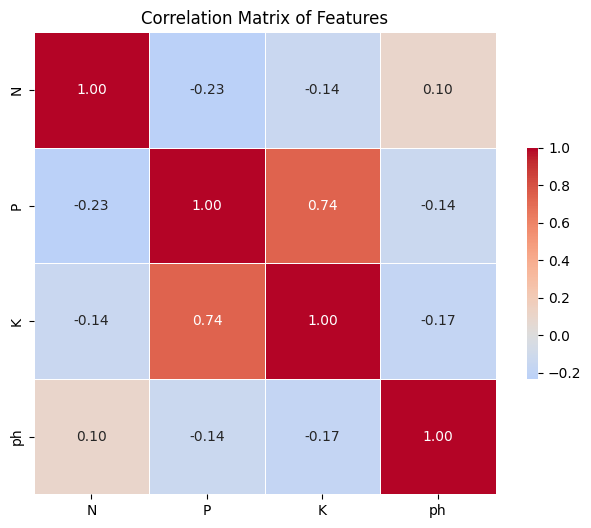

In [61]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
# 'annot=True' to annotate the heatmap with correlation values
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Features')
plt.show()

In [62]:
# Selecting the final features ('P' is left out)
final_features = ['N', 'K', 'ph']

Now I have to prepare for the final model.

In [63]:
# Re-split the data with the final features
X_final = X[final_features]
y_final = y

# Use the same test_size and random_state as before
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

In [64]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred_final = log_reg.predict(X_test_final)

# Evaluate the model's performance
model_performance = f1_score(y_test_final, y_pred_final, average='weighted')

# Print the final model's F1 score
print(f"The final model's F1 score is: {model_performance}")

The final model's F1 score is: 0.558010495235685
